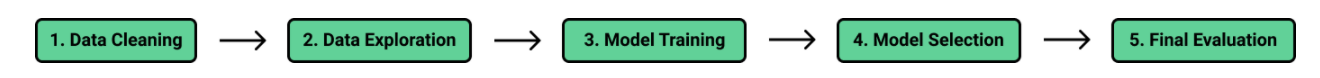

For this project, we'll practice this workflow on a completely new dataset and use it to predict a car's market price using its various characteristics, including body style, engine type and horsepower.

We recommend reading more about the dataset [at the UCI Machine Learning Archive](https://archive.ics.uci.edu/ml/datasets/automobile).

Download the dataset directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data)

[solution](https://github.com/dataquestio/solutions/commit/a68f2fc5c4fa78f274ab2020f9eef8ff7b372a5a)

**Task**

1. Read the cars data into a tibble named `cars`.
2. Determine which columns are numeric and can be used as features and which column is the outcome we'd like to predict.
    * Remove the columns that we cannot use and make sure all of the columns are actually numeric.
3. Now that we have the numeric columns, make sure to remove any rows with missing values.
4. Display the first few rows of the `cars` tibble to make sure it looks usable in the k-nearest neighbors algorithm.
    * Using the `typeof()` function may be useful in confirming that all the columns are in fact numeric

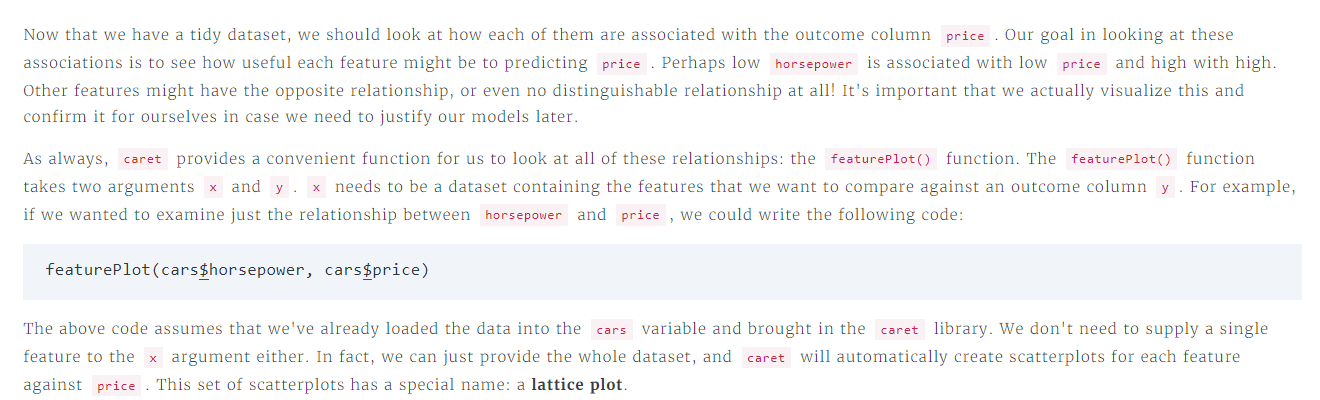

**Task**

1. Use the `featurePlot()` to create a lattice plot of the `cars` dataset.
2. Write some notes on the different associations between the `features` and `price`. Note any positive or negative relationships. 
3. Visualize the distribution of the `price` outcome. Are there any outliers or values that don't make sense? If so, these merit some investgation and consideration about whether or not we will omit them from analysis.

The data is prepared and now we have a better idea of how each of the features relate to `price`. The next step we need to take is to split the dataset into training and test sets. We need to decide ourself how much data we want to allocate to each of the set, but it is generally good to allocate most of the data to the training set. This has benefits down the line when we need to perform the cross-validation.

**Task**

1. Use `createDataPartition()` to split our data into a training and test set.

Before we can move forward with creating different models, we need to decide how to approach our cross-validation and hyperparameter optimization. We learned about k-fold cross-validation, and we just need to decide how many folds we want to use. 

We may use any number of folds that we want, but remember to at least consider how this will affect the validation error metrics. We've learned about the bias-variance tradeoff, and it's something we should always keep in mind when we're doing machine learning.

In hyperparameter optimization, we want to make sure that we have a wide enough range of candidates for hyperparameters so that we can see a clear minimum in the validation error metrics. K-nearest neighbors is convenient for us because we only have to deal with one hyperparameter, but that shouldn't stop us from choosing a wide range of values for `k`. `caret` does all of the testing for us behind the scenes, so we should take advantage of this.

**Task**

1. Set up our `trainControl()` list to use whatever form of cross-validation that we want to use with the model.
2. Create a hyperparameter grid to give to the `train()` function. Remember that we have to make sure that the column names of this grid match up with the expected hyperparameters for k-nearest neighbors (`k`).

We've done all of the preparation needed to start producing models in `caret`. With cross-validation and hyperparameter optimization in place, we are assured that each of the models is assessed in the same way, which enables us to compare them. Our ultimate goal with this project is to produce a model with the best possible predictions of car prices from the features we have. However, we don't know ahead of time which combination of features will give us this model, so we'll need to do a little bit of experimentation.

There's no set way to approach this experimentation, so we can provide a few suggestions. One possible avenue is to start with all of the features in the dataset and see how this full model performs. Then, we could iteratively remove features to see if this improves or worsens the test error. Alternatively, we could iterate through all the features and see how well a single feature performs in prediction. After choosing the best one, we could add a second one that best improves performance, and so on.

The point is that choosing a final model resembles more an art than a science. In the `cars` dataset, we could theoretically check all of the possible combinations of features since the number of feature columns is small. However, we wouldn't be able to do this with even moderately larger datasets. Furthermore, we may come to a point where extra features only improve prediction ability by tiny amounts, so we'll have to decide where to stop.

After some experimentation, pick one or a few models to keep as our "candidate" models. Use lattice plot from earlier to help guide our decision.

After we're happy with our machine learning models, it's time to evaluate them against the test data. we'll find that a bulk of the machine learning process goes into cleaning the data and working almost exclusively with the training data for cross-validation. This is okay! The evaluation with the test data should always be the absolute last thing we check. 

Once we see the test error, we should compare it against the errors that we observed in the cross-validation. Are they somewhat close? Are there unexpected differences? The answers to these questions should also color our final perception of the model's performance.

In our last file, we had two models and created a nice table to compare their test MSEs. This approach is great when we have multiple models and need a compact way to compare them or keep our results in a report. 

To give yet another alternative to this approach, `caret` in its glory also has a function to conveniently return all the relevant error metrics. This function is `postResample()`. `postResample()` takes two arguments: `pred` and `obs`. The first argument `pred` takes a vector that represents the model predictions, while the second argument `obs` is the actual values themselves. If we had a trained `caret` model, we could use the function as follows:

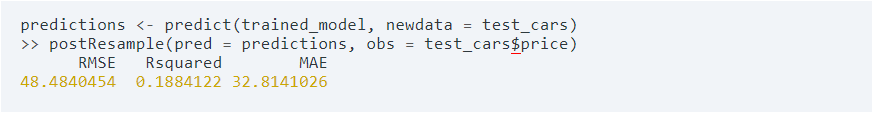

`postResample()` returns a named vector, as seen above. That being said, evaluate all of our models against the test set and see how our model performs.

That's it for the project! Here are some ideas for other ways that we can take this project:

1. We learned about holdout validation and k-fold cross-validation. There are other types of cross-validation available in `caret`, so take some time to explore them.
2. K-nearest neighbors is the model we used for this particular project. There are other types of machine learning models that can be used in **regression** problems. Take some time to research another model and try to apply the workflow we've learned on this new model.
    * A different model comes with different hyperparameters and parameters to consider, so keep this in mind when we do our hyperparameter optimization
3. Compare this second model to the performance of the k-nearest neighbors, which one seems to perform better on this dataset?